In [1]:
import sklearn
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
!ls data

input_test_b1Yip6O.csv input_train.csv        output_train.csv


In [3]:
input_train = pd.read_csv("data/input_train.csv")
output_train = pd.read_csv("data/output_train.csv")

In [99]:
intention_count_df = output_train["intention"].value_counts().reset_index()
intention_count_df.head()

,index,intention
0,28,1796
1,31,565
2,44,560
3,22,461
4,48,387


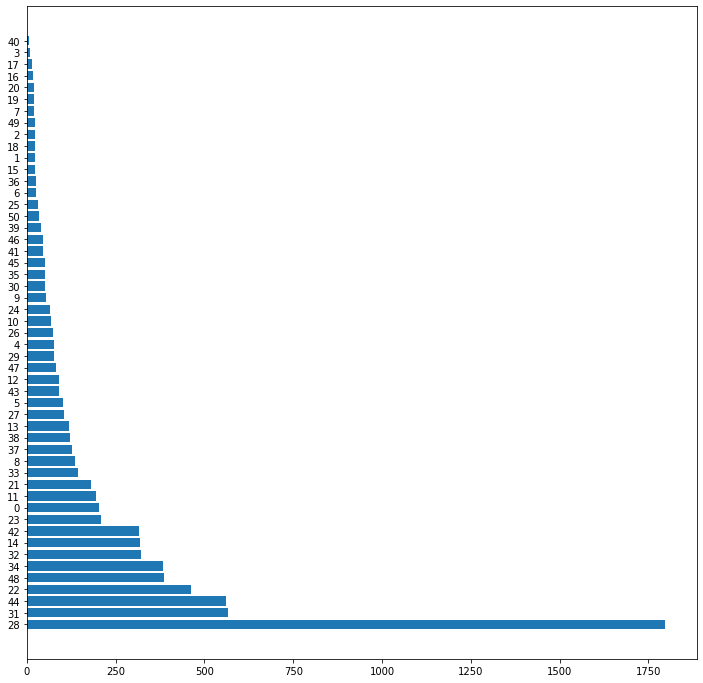

In [100]:
ind = np.arange(intention_count_df.shape[0])
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, intention_count_df["intention"].values)
ax.set_yticks(ind)
ax.set_yticklabels(intention_count_df["index"].values ,rotation='horizontal')
plt.show()

In [4]:
input_train.shape, output_train.shape

((8028, 2), (8028, 2))

In [5]:
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [6]:
output_train.head()

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [104]:
stop_words_fr = stopwords.words("french")
x_vect_count = CountVectorizer(min_df=5, stop_words=stop_words_fr).fit(input_train["question"])
x_train_count = x_vect_count.transform(input_train["question"])
y = output_train["intention"]

In [84]:
feature_names = x_vect_count.get_feature_names()
print(" feature len {}\n".format(len(feature_names)))
print("feature begining {} \n".format(feature_names[:20]))
print("feature midlr {} ".format(feature_names[200:220]))

 feature len 2046

feature begining ['00', '10', '100', '100mg', '10h', '10mg', '11', '11h', '12', '12h', '13', '14', '15', '150', '150mg', '15ch', '16', '17', '18', '19'] 

feature midlr ['arnica', 'arret', 'arrete', 'arreter', 'arreté', 'arrive', 'arrivent', 'arriver', 'arrivé', 'arrivée', 'arrivées', 'arréter', 'arrété', 'arrêt', 'arrête', 'arrêter', 'arrêté', 'arrêtée', 'arsenicum', 'aspegic'] 


In [107]:
x_train_count .shape

(8028, 2046)

In [258]:
np.nonzero(x_train_count[:1,:].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([ 145,  300,  348,  467,  490,  541,  550,  794,  805,  885,  887,
         922, 1081, 1105, 1121, 1223, 1302, 1310, 1428, 1453, 1537, 1601,
        1685, 1869, 1905, 1991]))

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_train_count, y)

In [108]:
x_train.shape, y_train.shape

((6021, 2046), (6021,))

In [111]:
svc = SVC().fit(x_train, y_train)

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [113]:
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.22654044178707855, 0.21524663677130046)

In [115]:
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


# TFIDF method

In [322]:
# need to clean a bit my sentences remove - , : ...

In [341]:
stop_words_fr = stopwords.words("french")
cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)).lower() for row  in input_train["question"]   ]
cleaned_sentence_array[0]             

'bonjour   je m suis trompé de forum pour ma question alors je la repose ici  je pris pour la première fois hier du paroxétine et ce matin c est une catastrophe  picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement  j en suis à deux crises depuis 5 heure du mat  la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous'

In [254]:
input_train["question"]

0       bonjour,  je m suis trompé de forum pour ma qu...
1       est ce que le motilium me soulagera contre les...
2       mon médecin m'a prescrit adenyl. au 2ème cache...
3       Est-ce qu'il existe une forme adaptée aux enfa...
4       mon  medecin  me soigne  pour  une  rhino  pha...
                              ...                        
8023    en combien de temps un antibio n'est plus prés...
8024    j'ai fait vacciner de revaxis mon fils 'année ...
8025    Un patient m’a ramené une ordonnance de 3x1g d...
8026    prise pillule du lendemain, faire une pause en...
8027                                    advil médicament?
Name: question, Length: 8028, dtype: object

In [327]:
y = output_train["intention"]

In [342]:
text_train = TfidfVectorizer(min_df=5, stop_words=stop_words_fr).fit_transform(cleaned_sentence_array)

In [343]:
text_train

<8028x2046 sparse matrix of type '<class 'numpy.float64'>'
	with 59954 stored elements in Compressed Sparse Row format>

In [344]:
x_train_idf, x_test_idf, y_train_idf, y_test_idf = train_test_split(text_train,y)

In [345]:
x_train_idf.shape ,x_test_idf.shape

((6021, 2046), (2007, 2046))

In [346]:
grid = {"C":[0.001,0.01,1,10,100], "gamma":[0.001,0.01,1,10,100]}

In [347]:
gs_idf = GridSearchCV(SVC(), grid, cv=3)

In [348]:
gs_idf.fit(x_train_idf, y_train_idf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [349]:
gs_idf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [350]:
gs_idf.best_score_

0.604384653712008

In [351]:
gs_idf.score(x_train_idf, y_train_idf), gs_idf.score(x_test_idf, y_test_idf)

(0.9265902673974423, 0.6203288490284006)

In [352]:
pd.DataFrame(gs_idf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.173661,0.032522,0.772951,0.020625,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.219585,0.221226,0.222390,0.221060,0.001151,14
1,1.175652,0.017797,0.776914,0.004191,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.219585,0.221226,0.222390,0.221060,0.001151,14
2,1.222351,0.004381,0.763392,0.009417,0.001,1,"{'C': 0.001, 'gamma': 1}",0.219585,0.221226,0.222390,0.221060,0.001151,14
3,1.285483,0.029623,0.791258,0.059659,0.001,10,"{'C': 0.001, 'gamma': 10}",0.219585,0.221226,0.222390,0.221060,0.001151,14
4,1.634155,0.079833,0.734701,0.015782,0.001,100,"{'C': 0.001, 'gamma': 100}",0.219585,0.221226,0.222390,0.221060,0.001151,14
5,1.233728,0.023919,0.809147,0.037039,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.219585,0.221226,0.222390,0.221060,0.001151,14
6,1.203839,0.004487,0.785030,0.009640,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.219585,0.221226,0.222390,0.221060,0.001151,14
7,2.393610,0.030828,0.790330,0.011203,0.01,1,"{'C': 0.01, 'gamma': 1}",0.219585,0.221226,0.222390,0.221060,0.001151,14
8,3.596744,0.036239,0.780380,0.005394,0.01,10,"{'C': 0.01, 'gamma': 10}",0.219585,0.221226,0.222390,0.221060,0.001151,14
9,3.649868,0.171750,0.811934,0.009964,0.01,100,"{'C': 0.01, 'gamma': 100}",0.219585,0.221226,0.222390,0.221060,0.001151,14


In [338]:
# TRY to normalize to improve SVC perf

In [141]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
scaler = MaxAbsScaler()
x_train_scaled = scaler.fit_transform(x_train_idf)
x_test_scaled = scaler.transform(x_test_idf)

In [140]:
x_scaled

<6021x2046 sparse matrix of type '<class 'numpy.float64'>'
	with 44861 stored elements in Compressed Sparse Row format>

In [142]:
svc_idf_scaled = SVC().fit(x_train_scaled, y_train_idf)

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [143]:
svc_idf_scaled.score(x_train_scaled, y_train_idf), svc_idf_scaled.score(x_test_scaled, y_test_idf)

(0.22504567347616675, 0.21973094170403587)

In [354]:
# Try FRENCH STEMMER
import nltk
stemmer_fr=nltk.stem.snowball.FrenchStemmer()

In [355]:
def stemming_tokenizer_fr(str_input):
    #cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)).lower() for row  in input_train["question"]   ]

    words = re.sub(",|-|'|\.|\?", " ", str_input).lower().split()
    words = [stemmer_fr.stem(word) for word in words]
    return words

tf_vectorizer_2 = TfidfVectorizer(tokenizer=stemming_tokenizer_fr,
                       stop_words = stop_words_fr,
                       min_df = 5).fit(input_train["question"])

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [356]:
x_fr = tf_vectorizer_2.transform(input_train["question"])

In [358]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_fr, y)

In [359]:
x_train_1.shape

(6021, 1862)

In [365]:
grid = {"C":[0.001,0.01,1,10,100], "gamma":[0.001,0.01,1,10,100]}
gs = GridSearchCV(SVC(), grid, cv=5)

In [366]:
gs.fit(x_train_1, y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [367]:
gs.score(x_train_1, y_train_1), gs.score(x_test_1, y_test_1)

(0.9345623650556386, 0.6472346786248132)

In [368]:
gs.best_score_, gs.best_params_

(0.6281348613187179, {'C': 100, 'gamma': 0.01})

In [369]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.867238,0.037329,0.601249,0.019354,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
1,1.878413,0.040647,0.618903,0.030111,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
2,2.079878,0.039166,0.623542,0.010690,0.001,1,"{'C': 0.001, 'gamma': 1}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
3,2.138148,0.017886,0.625777,0.004580,0.001,10,"{'C': 0.001, 'gamma': 10}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
4,2.671735,0.020434,0.587312,0.006001,0.001,100,"{'C': 0.001, 'gamma': 100}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
5,1.902655,0.008130,0.615129,0.005806,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
6,1.922035,0.008422,0.611498,0.003890,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
7,3.660770,0.038898,0.627157,0.002911,0.01,1,"{'C': 0.01, 'gamma': 1}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
8,5.914565,0.044110,0.630685,0.002257,0.01,10,"{'C': 0.01, 'gamma': 10}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15
9,5.708607,0.112368,0.613545,0.014103,0.01,100,"{'C': 0.01, 'gamma': 100}",0.219951,0.221582,0.223237,0.225293,0.227004,0.223385,0.002521,15


In [238]:
# MATRICE DE CONFUSION / RAPPEL / F1_SCORE

In [370]:
from sklearn.metrics import confusion_matrix
pred = gs.predict(x_test_1)
confusion = confusion_matrix(y_test_1, pred)

In [371]:
confusion

array([[23,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 62,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

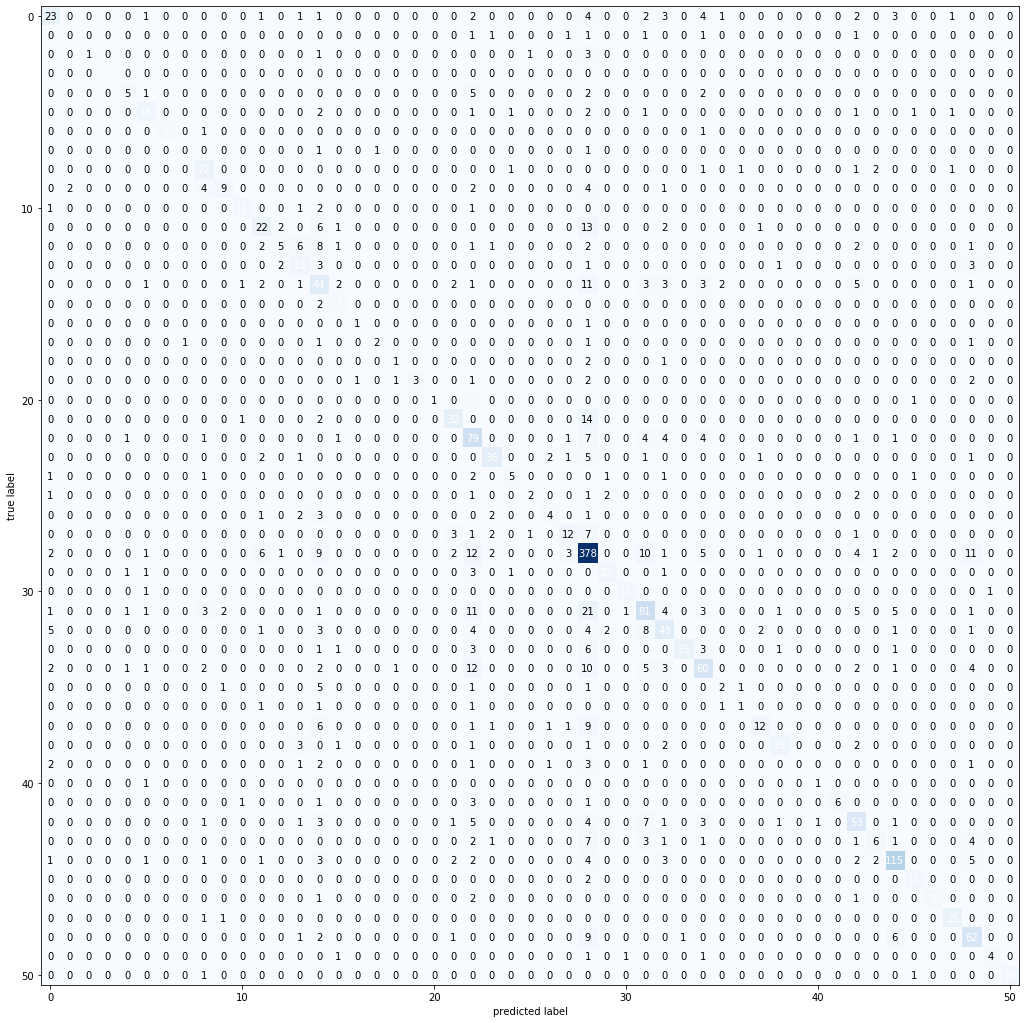

In [372]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(18,18))
plt.show()

In [373]:
from sklearn.metrics import f1_score
f1_score(y_test_1, pred, average="micro") ,f1_score(y_test_1, pred, average="macro") 

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6472346786248132, 0.5399088665628495)

# Word2vec

In [12]:
from gensim.models import Word2Vec
import re
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [9]:
input_train.shape

(8028, 2)

In [264]:
pd.set_option('display.width', 10000)
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [267]:
stop_words_fr = stopwords.words("french")
cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)) for row  in input_train["question"]   ]
cleaned_sentence_array[0]             

'bonjour   je m suis trompé de forum pour ma question alors je la repose ici  je pris pour la première fois hier du paroxétine et ce matin c est une catastrophe  picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement  j en suis à deux crises depuis 5 heure du mat  la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous'

In [299]:
def get_sentence_splited_list(cleaned_sentence_array):
    sentence_splited_list = []
    for sentence in cleaned_sentence_array:
        new_splited_sentence = []
        for word in sentence.split(" "):
            if word and len(word) >2 and word not in stop_words_fr:
                new_splited_sentence.append(word.lower())
        sentence_splited_list.append(new_splited_sentence) 
    return sentence_splited_list
    

In [300]:
def get_vector_list(sentence_splited_list, w2v_model):
    empty_vector_list = []
    vector_list = []
    #test = []
    for index, word_list in enumerate(sentence_splited_list): #[1:2]:
        #print (word_list)
        vocab_words = []
        for word in word_list:
            if word in w2v_model.wv.vocab.keys():
                vocab_words.append(w2v_model.wv[word])
                #test.append(w2v_model.wv[word][0])
        #print(vocab_words)
        if not vocab_words:
            #print(index)
            #print("empty array")
            empty_vector_list.append(index)
            
        else:
            mean_vect = np.mean(vocab_words, axis=0)
            vector_list.append(mean_vect)
    return vector_list, empty_vector_list

In [301]:
sentence_splited_list = get_sentence_splited_list(cleaned_sentence_array)
splited_df = pd.DataFrame({"question_splited": sentence_splited_list})
splited_df.head()

,question_splited
0,"[bonjour, trompé, forum, question, alors, repo..."
1,"[motilium, soulagera, contre, nausées]"
2,"[médecin, prescrit, adenyl, 2ème, cachet, maux..."
3,"[est, existe, forme, adaptée, enfant, 5ans, mi..."
4,"[medecin, soigne, rhino, pharingite, prescrit,..."


In [302]:
from collections import defaultdict
word_freq = defaultdict(int)
for sent in sentence_splited_list:
    for w in sent:
        word_freq[w] += 1
len(word_freq)

10812

In [303]:
w2v_model = Word2Vec(sentence_splited_list,
                     min_count=10,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     sg=1
                     )
vector_list, empty_vector_list = get_vector_list(sentence_splited_list, w2v_model)

In [417]:
w2v_model.wv.vocab.keys()

dict_keys(['bonjour', 'forum', 'question', 'alors', 'ici', 'pris', 'première', 'fois', 'hier', 'paroxétine', 'matin', 'tous', 'corps', 'très', 'vomissement', 'deux', 'crises', 'depuis', 'heure', 'cela', 'semble', 'passer', 'mains', 'reste', 'normal', 'merci', 'contre', 'nausées', 'médecin', 'prescrit', '2ème', 'cachet', 'maux', 'tête', 'palpitations', 'sueurs', 'chaleur', 'tremblements', 'dès', 'arrêt', 'médicament', 'symptômes', 'déjà', 'arrivé', 'quelqu', 'est', 'existe', 'forme', 'enfant', 'medecin', 'amoxicilline', 'comme', 'anti', 'vraiment', 'cette', 'indication', 'viens', 'enceinte', 'savez', 'peux', 'dangereux', 'long', 'terme', 'sous', 'mercilon', 'saignements', 'quoi', 'prend', 'trinordiol', 'fin', 'plaquette', 'copain', 'pilule', 'donc', 'bien', 'efficace', 'debut', 'douleur', 'poitrine', 'impression', 'peu', 'plus', 'mal', 'bas', 'dois', 'laroxyl', 'doses', 'stress', 'psy', 'dit', 'prendre', '50mg', 'sertraline', 'soir', 'peut', '100mg', 'midi', 'bientot', 'semaine', 'sais'

In [437]:
# save wv_model in pickle
filename_wv = 'word2vec_model.sav'
pickle.dump(w2v_model, open(filename_wv, 'wb'))


In [438]:
loaded_model = pickle.load(open(filename_wv, 'rb'))

In [439]:
loaded_model.wv["grossesse"]

array([-2.11111568e-02,  4.70625646e-02, -1.62574336e-01, -1.85251236e-01,
        9.32878330e-02, -2.10314870e-01, -1.55153602e-01,  5.57471275e-01,
        2.52545208e-01, -1.75033450e-01,  8.35994631e-02,  1.55923918e-01,
        1.06819764e-01,  7.53539205e-02, -5.03516123e-02,  1.70250565e-01,
        3.35607082e-02,  1.42688975e-01,  1.53487295e-01, -2.29011569e-02,
       -2.33930901e-01, -6.51472360e-02, -2.74805315e-02,  1.63735226e-01,
        1.19199179e-01, -2.53687538e-02,  1.46250557e-02,  5.02729714e-02,
        9.54420865e-02,  9.61372107e-02,  5.91148660e-02, -6.94807917e-02,
        6.98641762e-02,  1.00456163e-01,  2.23745391e-01,  5.22618042e-03,
       -2.25227326e-01, -1.72498778e-01,  2.91327506e-01, -3.14963609e-01,
        7.22332671e-02,  4.68509272e-02, -2.38041133e-01,  1.28257181e-02,
        2.02650949e-01,  3.53968561e-01, -8.71009529e-02,  1.17101781e-01,
       -4.76881117e-02, -6.65454268e-02,  3.49712014e-01, -1.02459356e-01,
       -1.22074097e-01,  

In [304]:
len(vector_list)

7820

In [305]:
output_without_na = output_train.intention.copy()
for index in reversed(empty_vector_list):
    output_without_na.pop(index)


In [306]:
len(output_train.intention), len(output_without_na)

(8028, 7820)

In [307]:
len(empty_vector_list)

208

In [320]:
vector_list[:1]

[array([-0.02248336,  0.04687505, -0.1641482 , -0.18325695,  0.09454917,
        -0.2112281 , -0.15443636,  0.5657513 ,  0.25201243, -0.17368506,
         0.08619639,  0.15894769,  0.10341179,  0.07816289, -0.05388571,
         0.17109661,  0.03643755,  0.14423819,  0.15261771, -0.02326376,
        -0.23338555, -0.05936332, -0.02247147,  0.1669953 ,  0.11556664,
        -0.02208309,  0.01546241,  0.04547411,  0.09416819,  0.09606989,
         0.05855985, -0.06831264,  0.07517734,  0.10118445,  0.22561915,
         0.0043017 , -0.22392868, -0.17458211,  0.29711643, -0.31732818,
         0.07790334,  0.05182887, -0.23745033,  0.00692797,  0.20077148,
         0.35502928, -0.08364818,  0.12221667, -0.04585804, -0.06269227,
         0.35180345, -0.10415153, -0.12474247,  0.09711885, -0.4212531 ,
        -0.07183241,  0.26547018,  0.36828214,  0.21012197,  0.10549582,
        -0.18775895, -0.03154062, -0.07097395,  0.03010649,  0.00464217,
        -0.2757436 ,  0.06794237,  0.02111209,  0.0

In [309]:
x_train, x_test, y_train, y_test = train_test_split(vector_list, output_without_na) 

In [310]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [311]:
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.023123,0.045866,-0.163452,-0.183587,0.092692,-0.213284,-0.153785,0.561962,0.252081,-0.173866,...,0.098689,-0.120002,0.189562,-0.062404,0.164402,0.311555,-0.001159,-0.086624,0.092746,0.086938
1,-0.021280,0.043591,-0.160078,-0.176484,0.091541,-0.203297,-0.149225,0.548890,0.243566,-0.166845,...,0.095762,-0.121163,0.183105,-0.059628,0.162406,0.305653,-0.003957,-0.084842,0.088892,0.083861
2,-0.019531,0.047683,-0.164782,-0.180650,0.096614,-0.213880,-0.152749,0.564460,0.250655,-0.172092,...,0.099723,-0.120642,0.186995,-0.062281,0.165505,0.313849,-0.004797,-0.086416,0.091905,0.084494
3,-0.022775,0.047320,-0.157104,-0.179764,0.092367,-0.204656,-0.151966,0.549904,0.245616,-0.172508,...,0.096164,-0.121700,0.182061,-0.066063,0.163263,0.305534,-0.001797,-0.081283,0.091370,0.081538
4,-0.022977,0.047319,-0.163388,-0.179172,0.093867,-0.206919,-0.148944,0.553830,0.247878,-0.171566,...,0.095846,-0.119455,0.183998,-0.062234,0.160530,0.307366,-0.002725,-0.083575,0.092215,0.084583


In [312]:
grid = {"gamma": [0.001, 0.01, 0.1,1,10, 100], "C":[0.001, 0.01, 0.1,1,10,100]}
#grid = {"gamma": [ 100, 1000], "C":[1000,100]}

In [398]:
gs_wv = GridSearchCV(SVC(probability=True),grid, cv=3)

In [399]:
gs_wv.fit(x_train_df, y_train)

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [400]:
gs_wv.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [401]:
gs_wv.best_score_

0.4751918158567775

In [402]:
gs_wv.score(x_test_df, y_test)

0.49411764705882355

In [380]:
from sklearn.metrics import confusion_matrix
pred = gs_wv.predict(x_test_df)
confusion = confusion_matrix(y_test, pred)

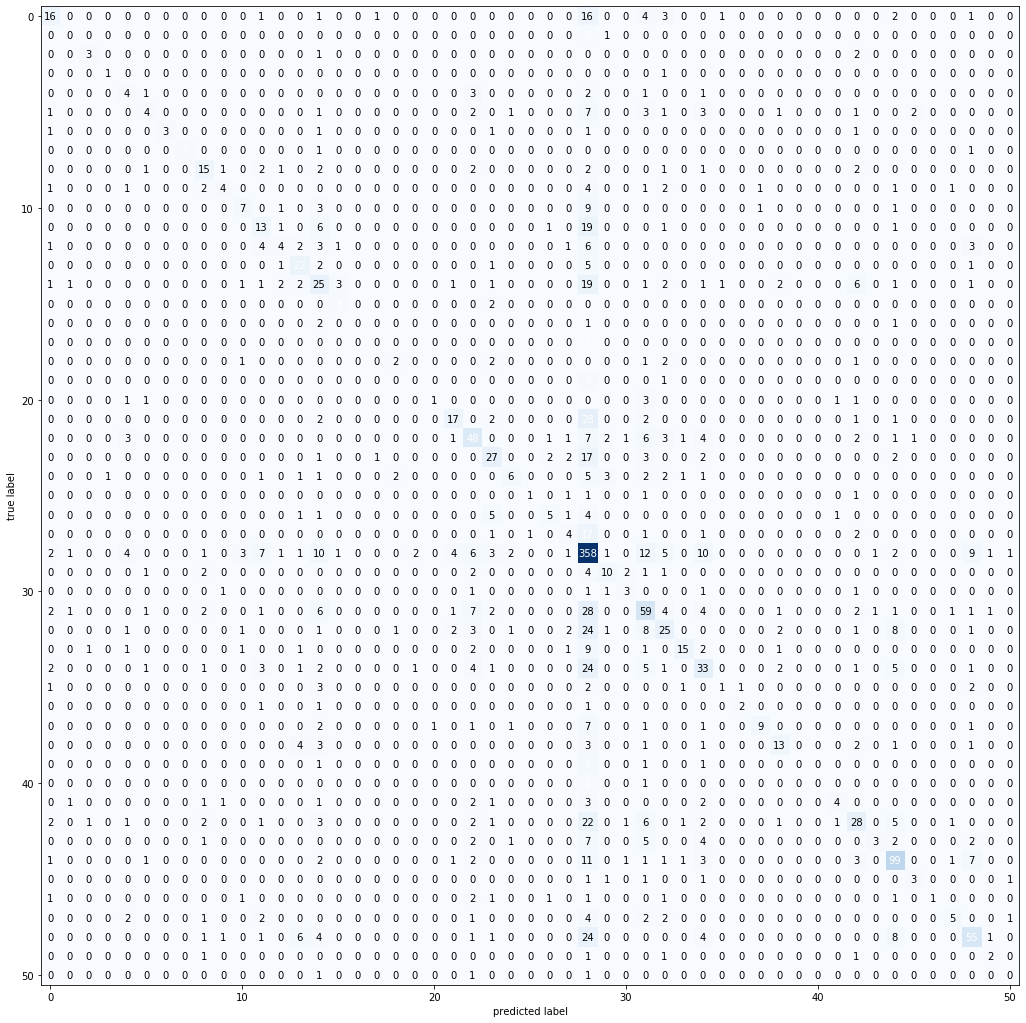

In [381]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(18,18))
plt.show()

In [382]:
f1_score(y_test, pred, average="micro") ,f1_score(y_test, pred, average="macro") 

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.49411764705882355, 0.34887839618025934)

In [383]:
import pickle

In [435]:
filename = 'svm_wv_model.sav'
pickle.dump(gs_wv.best_estimator_, open(filename, 'wb'))

In [423]:
gs_wv.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# autre test

In [424]:
loaded_model = pickle.load(open(filename, 'rb'))

In [425]:
loaded_model.score(x_test_df, y_test)

0.49411764705882355

In [406]:
query_to_test = "risques poisson cru pendant la grossesse ?"

In [407]:
cleaned_query_to_test = [re.sub(",|-|'|\.|\?" ," ", str(query_to_test)).split(" ") ]

In [408]:
cleaned_query_to_test

[['risques', 'poisson', 'cru', 'pendant', 'la', 'grossesse', '', '']]

In [409]:
cleaned_query_vectorized = get_vector_list(cleaned_query_to_test, w2v_model) 

In [410]:
loaded_model.predict(cleaned_query_vectorized[0])

array([44])

In [411]:
loaded_model.predict_proba(cleaned_query_vectorized[0])

array([[2.28105275e-03, 3.49205293e-04, 8.39932559e-04, 9.81808254e-05,
        6.11031770e-04, 6.77847627e-04, 2.65075377e-04, 2.39037432e-04,
        6.65954684e-04, 2.81377340e-04, 3.63811121e-04, 1.31509777e-03,
        6.68476006e-04, 1.32086757e-03, 3.35304143e-03, 1.38963300e-04,
        1.25994321e-03, 8.58368093e-04, 3.73870190e-04, 3.11880460e-04,
        1.13219790e-04, 1.22269270e-03, 1.25543029e-03, 2.04101369e-03,
        1.80688604e-04, 2.44470671e-04, 5.22351739e-03, 1.25921075e-03,
        4.59701941e-03, 1.95156596e-04, 1.95589663e-04, 3.68547519e-03,
        3.75321193e-03, 1.94835805e-03, 2.25600768e-03, 4.75229761e-04,
        4.29797612e-04, 1.95295340e-03, 1.63916212e-03, 6.10637574e-03,
        3.10579912e-04, 2.61611553e-04, 3.82970568e-03, 7.69235824e-03,
        8.89797017e-01, 1.94104199e-04, 5.51541366e-04, 7.50782335e-04,
        4.12505027e-02, 1.59087388e-04, 1.55113769e-04]])

In [426]:
np.argmax(loaded_model.predict_proba(cleaned_query_vectorized[0]))

44

In [434]:
loaded_model.predict_proba(cleaned_query_vectorized[0])[0][44]

0.8897970169742426

In [ ]:
# HERE IT MIGHT WORK BUT ENGLISH ONLY

In [182]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [191]:
tf_vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(),
                       #strip_accents = 'unicode',
                       stop_words = stop_words_fr,
                       #token_pattern = r'\b[a-zA-Z]{3,}\b', # keeps words of 3 or more characters
                       #max_df = 0.5,
                       min_df = 5).fit(input_train["question"])
tf_vect = tf_vectorizer.transform(input_train["question"])

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'avon', 'e', 'fuss', 'no', 'pa', 'serum', 'somme'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [202]:
import re
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [203]:
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [204]:
tf_vectorizer_3 = TfidfVectorizer(tokenizer=stemming_tokenizer,
                       stop_words = stop_words_fr,
                       min_df = 5).fit(input_train["question"])

/Users/antoine/Documents/Tests/Posos/posos_interview/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aurion', 'auron', 'avai', 'avion', 'avon', 'ayon', 'dan', 'e', 'ell', 'euss', 'eussion', 'f', 'fu', 'fuss', 'fussion', 'mai', 'no', 'notr', 'nou', 'pa', 'serion', 'seron', 'soi', 'somm', 'soyon', 'sui', 'tai', 'taient', 'tait', 'tant', 'tiez', 'tion', 'vo', 'votr', 'vou'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
